## Multiple Linear Regression

In the previous topic, we have learned about Simple Linear Regression, where a single Independent/Predictor(X) variable is used to model the response variable (Y). But there may be various cases in which the response variable is affected by more than one predictor variable; for such cases, the Multiple Linear Regression algorithm is used.

Estimation of the parameters by the method of least squares is based on the same principle as that of simple linear regression, but applied to p-dimensions. It is thus no longer a question of finding the best line (the one which passes closest to the pairs of points, but finding the 
p-dimensional plane which passes closest to the coordinate points.

### Let's first import all the required packages

<b>numpy</b>: for working with arrays  
<b>matplotlib</b>: for plotting purposes  
<b>pandas</b>: for working with dataframes  
<b>sklearn</b>: our go to tool for applying various machine learning in built models; scikit learn.  
<b>sklearn.linear_model</b>: for importing <span style='color:violet'>LinearRegression</span> which will do the fitting  
<b>sklearn.model_selection</b>: for importing <span style='color:violet'>train_test_split</span>; which will split the dataset into train and test data  
<b>sklearn.metric</b>: for importing <span style='color:violet'>r2_score</span> which is R^2 = 1 - (SS_RES/SS_TOT)  where SS_RES is is the sum of squares of the residual errors and SS_TOT is is the total sum of the errors.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Let's import the dataset of 50 start up's balance sheet

In [2]:
df = pd.read_csv('50_Startups.csv')

In [3]:
df.head() # shows the first five rows of the dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### x contains all the features except for the target variable; y contains the target variable.
<span style='color:violet'>.drop</span> methods helps to drop an entire column form a dataset; axis = 1 tells to drop a column; axis = 0 will drop a row.

In [4]:
x = df.drop('Profit',axis=1)
y = df['Profit']

### Convert categorical variable into dummy variables
<span style='color:violet'>.get_dummies</span> method convert categorical variable into dummy/indicator variables
whereas '<b>drop_first=True</b>' get k-1 dummies out of k categorical levels by removing the first level.
Suppose there are three categorical variables, like here states can be <b>New York</b>,<b>Florida</b> and <b>California</b> but when represent them in dummy varibale we can drop one state say <b>California</b> as if the other two states are 0 and 0 it automatically means it is the state is <b>California</b> for this case.

In [5]:
states = pd.get_dummies(x['State'],drop_first=True)

### Now let's drop the "State" categorical variable from our original dataset as we have converted that to dummy varibales and concat those new columns to our original dataset x
<span style='color:violet'>.concat</span> concatenate pandas objects along a particular axis. axis = 1 tells to concatenate along a column; axis = 0 will do the same along a row.

In [6]:
x = x.drop('State',axis=1)

In [7]:
x = pd.concat([x,states],axis=1)

In [18]:
x

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0
5,131876.90,99814.71,362861.36,0,1
6,134615.46,147198.87,127716.82,0,0
7,130298.13,145530.06,323876.68,1,0
8,120542.52,148718.95,311613.29,0,1
9,123334.88,108679.17,304981.62,0,0


#### Now let us split the dataset in 80% for training purpose and the rest 20% for testing purpose. For that we will use <span style='color:violet'>train_test_split</span> method.  
The random state hyperparameter in the train_test_split() function controls the shuffling process. With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control. With random_state=0 , we get the same train and test sets across different executions

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x ,y , test_size = 0.2, random_state = 0)

#### Plot the dependency of the target variable based on different features like "R&D Spend", "Administration","Marketing Spend" etc.

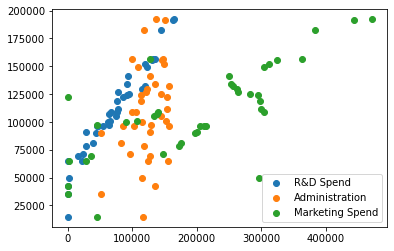

In [9]:
plt.scatter(x_train['R&D Spend'],y_train,label='R&D Spend')
plt.scatter(x_train['Administration'],y_train,label='Administration')
plt.scatter(x_train['Marketing Spend'],y_train,label='Marketing Spend')
plt.legend()

#### Let's train the model  
<span style='color:violet'>LinearRegression</span> fits a linear model with coefficients w = (w1, …, wp) to minimize the <b>residual sum of squares</b> between the observed targets in the dataset, and the targets predicted by the linear approximation. We will always use <span style='color:violet'>(x_train,y_train)</span> in this order within the the <b>.fit</b> command.

In [10]:
rg = LinearRegression()
rg.fit(x_train, y_train)
y_pred = rg.predict(x_test)

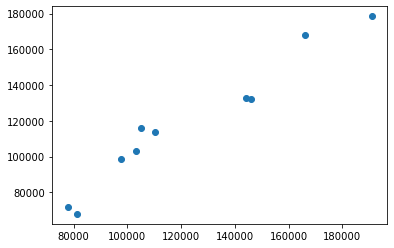

In [11]:
plt.scatter(y_test,y_pred)

In [12]:
y_test.tolist() # actual values

[103282.38,
 144259.4,
 146121.95,
 77798.83,
 191050.39,
 105008.31,
 81229.06,
 97483.56,
 110352.25,
 166187.94]

In [13]:
y_pred.tolist() # predicted values by the model

[103015.20159796179,
 132582.27760815562,
 132447.73845174478,
 71976.09851257896,
 178537.48221055063,
 116161.24230165101,
 67851.69209675623,
 98791.7337468745,
 113969.43533012441,
 167921.0656955042]

#### r2 Score  

R^2 = 1 - (SS_RES/SS_TOT)  where SS_RES is is the sum of squares of the residual errors <b>(y_true-y_pred)^2</b> and SS_TOT is the total sum of the errors<b>(y_true-y_mean)^2</b>.  
This is between 0 and 1. If the score is close to 1 that means the model is performing well. Higher the r2 score is lower the variance is.

In [14]:
score = r2_score(y_test, y_pred)

In [17]:
score

0.9347068473282423

### The model has been trained decently